## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#libraries for polymomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#importing statsmodel 
import statsmodels.api as sm

from geopy.geocoders import Nominatim
import seaborn as sns 

sns.set()

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import geopandas as gpd

import plotly.express as px
import folium

from folium.plugins import HeatMap

import pdfkit


In [2]:
# ! pip install pdfkit

In [3]:
# ! pip install folium

In [4]:
# ! pip install geopandas

## Source of my data

Source of my dataset: data.gov
    https://catalog.data.gov/dataset/crime-reports-bf2b7
        
        Public Crime Reports of the City of Austin Texas USA from 2003 to present date. My dataset includes creimes from 2003 until a cut to May 5 2024
        

In [5]:
# Importing my data 
df = pd.read_csv('crime_austin.csv')

/var/folders/bg/y7kw02d56cs5ppm0732gtmf40000gn/T/ipykernel_40324/4257766578.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime_austin.csv')


## This is how data looks

There is a lot of irrelevant information in my opionion

In [6]:
df

Incident Number     Highest Offense Description  \
0             2006471156              FAMILY DISTURBANCE   
1            20045044338        TAMPERING WITH ID NUMBER   
2             2006960811              FAMILY DISTURBANCE   
3             2013851154  SEXUAL ASSAULT OF CHILD/OBJECT   
4            20161800084                 RAPE OF A CHILD   
...                  ...                             ...   
2462412      20215001631                DEBIT CARD ABUSE   
2462413      20105013578             BURGLARY OF VEHICLE   
2462414      20085066651                PROTECTIVE ORDER   
2462415      20101570072     VIOL CITY ORDINANCE - OTHER   
2462416      20102371234             FORGERY AND PASSING   

         Highest Offense Code Family Violence      Occurred Date Time  \
0                        3400               N  02/16/2006 02:25:00 PM   
1                        2719               N  09/14/2004 03:32:00 PM   
2                        3400               N  04/06/2006 10:29:00 AM   
3                        1707               Y  01/01/2009 12:01:00 AM   
4                         204               Y  06/28/2016 01:05:00 AM   
...                       ...             ...                     ...   
2462412                  1108               N  09/24/2020 12:00:00 PM   
2462413                   601               N  03/19/2010 07:00:00 PM   
2462414                  3829               N  12/16/2008 03:56:00 PM   
2462415                  3299               N  06/06/2010 12:31:00 AM   
2462416                  1000               N  08/25/2010 04:05:00 PM   

        Occurred Date  Occurred Time        Report Date Time Report Date  \
0          02/16/2006         1425.0  02/16/2006 02:25:00 PM  02/16/2006   
1          09/14/2004         1532.0  09/14/2004 03:32:00 PM  09/14/2004   
2          04/06/2006         1029.0  04/06/2006 10:29:00 AM  04/06/2006   
3          01/01/2009            1.0  03/26/2013 04:56:00 PM  03/26/2013   
4          06/28/2016          105.0  06/28/2016 01:05:00 AM  06/28/2016   
...               ...            ...                     ...         ...   
2462412    09/24/2020         1200.0  01/13/2021 10:27:00 AM  01/13/2021   
2462413    03/19/2010         1900.0  03/19/2010 11:16:00 PM  03/19/2010   
2462414    12/16/2008         1556.0  12/16/2008 03:56:00 PM  12/16/2008   
2462415    06/06/2010           31.0  06/06/2010 12:31:00 AM  06/06/2010   
2462416    08/25/2010         1605.0  08/25/2010 04:05:00 PM  08/25/2010   

         Report Time  ... Census Tract Clearance Status  Clearance Date  \
0             1425.0  ...          NaN              NaN             NaN   
1             1532.0  ...          NaN                N      09/14/2004   
2             1029.0  ...          NaN                N      05/01/2006   
3             1656.0  ...         4.00                C      04/11/2013   
4              105.0  ...        24.41                C      07/01/2016   
...              ...  ...          ...              ...             ...   
2462412       1027.0  ...        24.47                N      01/14/2021   
2462413       2316.0  ...        19.11                N      03/25/2010   
2462414       1556.0  ...        13.00              NaN             NaN   
2462415         31.0  ...       431.00                C      08/07/2010   
2462416       1605.0  ...        13.00                N      08/26/2010   

         UCR Category Category Description X-coordinate Y-coordinate  \
0                 NaN                  NaN          NaN          NaN   
1                 NaN                  NaN          NaN          NaN   
2                 NaN                  NaN          NaN          NaN   
3                 11C                 Rape          0.0          0.0   
4                 11A                 Rape          0.0          0.0   
...               ...                  ...          ...          ...   
2462412           NaN                  NaN    3118294.0   10050405.0   
2462413           23F

In [7]:
df.shape

(2462417, 27)

In [8]:
# Dropping these columns that do not look to be interesting 

columns_to_drop = ['Incident Number', 'Occurred Date', 'Occurred Time', 
                   'Report Date Time', 'Report Date', 'Report Time', 'Address', 
                   'X-coordinate', 'Y-coordinate', 'Zip Code', 'UCR Category',
                   'Category Description', 'Clearance Date', 'Highest Offense Code',
                   'Location Type', 'PRA', 'Clearance Status', 'Location', 'Council District', 
                   'APD Sector', 'APD District', 'Census Tract', 'Family Violence' ]

In [9]:
# dropping columns that are inncesary 

df.drop(columns = columns_to_drop, inplace = True)

I want to conservate just the crime, when happened and where happened

In [10]:
df.head(3)

Highest Offense Description      Occurred Date Time  Latitude  Longitude
0          FAMILY DISTURBANCE  02/16/2006 02:25:00 PM       NaN        NaN
1    TAMPERING WITH ID NUMBER  09/14/2004 03:32:00 PM       NaN        NaN
2          FAMILY DISTURBANCE  04/06/2006 10:29:00 AM       NaN        NaN

In [11]:
df.shape

(2462417, 4)

## Cleaning the data 

In [12]:
# Checking how many missing values my data has 
missing_values = df.isnull().sum()

# Displaying values in each column

print('Missing Values in Each Column')
print(missing_values)

Missing Values in Each Column
Highest Offense Description        0
Occurred Date Time               137
Latitude                       37969
Longitude                      37969
dtype: int64


In [13]:
missing_values_sorted = missing_values.sort_values(ascending=False)

print("Missing values in each column (descending order):")
print(missing_values_sorted)

Missing values in each column (descending order):
Latitude                       37969
Longitude                      37969
Occurred Date Time               137
Highest Offense Description        0
dtype: int64


In [14]:
df.dropna(subset=['Latitude', 'Occurred Date Time', "Longitude"], inplace = True)

In [15]:
print(df.isnull().sum())

Highest Offense Description    0
Occurred Date Time             0
Latitude                       0
Longitude                      0
dtype: int64


In [16]:
df

Highest Offense Description      Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT  06/21/2023 06:16:00 PM  30.352698   
4918                FAMILY DISTURBANCE  09/23/2023 03:07:00 AM  30.325790   
6171                        AUTO THEFT  06/05/2023 08:00:00 PM  30.219033   
7307                FAMILY DISTURBANCE  05/29/2023 12:03:00 PM  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU  11/06/2023 03:53:00 PM  30.307438   
...                                ...                     ...        ...   
2462412               DEBIT CARD ABUSE  09/24/2020 12:00:00 PM  30.211876   
2462413            BURGLARY OF VEHICLE  03/19/2010 07:00:00 PM  30.265757   
2462414               PROTECTIVE ORDER  12/16/2008 03:56:00 PM  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER  06/06/2010 12:31:00 AM  30.358489   
2462416            FORGERY AND PASSING  08/25/2010 04:05:00 PM  30.243395   

         Longitude  
4326    -97.718252  
4918    -97.694442  
6171    -97.767189  
7307    -97.776806  
8720    -97.681970  
...            ...  
2462412 -97.731707  
2462413 -97.770554  
2462414 -97.770694  
2462415 -97.688952  
2462416 -97.764287  

[2424318 rows x 4 columns]

In [17]:
df.shape

(2424318, 4)

In [18]:
df.dtypes

Highest Offense Description     object
Occurred Date Time              object
Latitude                       float64
Longitude                      float64
dtype: object

In [19]:
# Converting to datetime 

df['Occurred Date Time'] = pd.to_datetime(df['Occurred Date Time'])

/var/folders/bg/y7kw02d56cs5ppm0732gtmf40000gn/T/ipykernel_40324/732537985.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Occurred Date Time'] = pd.to_datetime(df['Occurred Date Time'])


In [20]:
# Extracting date, time, and day of the week
df['Date'] = df['Occurred Date Time'].dt.date
df['Time'] = df['Occurred Date Time'].dt.time
df['Day_of_Week'] = df['Occurred Date Time'].dt.day_name()

# Extracting hour
df['Hour'] = df['Occurred Date Time'].dt.hour



## This is how my data looks cleaned. 

In [21]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude        Date      Time Day_of_Week  Hour  
4326    -97.718252  2023-06-21  18:16:00   Wednesday    18  
4918    -97.694442  2023-09-23  03:07:00    Saturday     3  
6171    -97.767189  2023-06-05  20:00:00      Monday    20  
7307    -97.776806  2023-05-29  12:03:00      Monday    12  
8720    -97.681970  2023-11-06  15:53:00      Monday    15  
...            ...         ...       ...         ...   ...  
2462412 -97.731707  2020-09-24  12:00:00    Thursday    12  
2462413 -97.770554  2010-03-19  19:00:00      Friday    19  
2462414 -97.770694  2008-12-16  15:56:00     Tuesday    15  
2462415 -97.688952  2010-06-06  00:31:00      Sunday     0  
2462416 -97.764287  2010-08-25  16:05:00   Wednesday    16  

[2424318 rows x 8 columns]

## Performing some Exploratory Data Analysis with Python

In [22]:
offense_counts = df['Highest Offense Description'].value_counts().head(15)

In [23]:
offense_counts

Highest Offense Description
BURGLARY OF VEHICLE               254063
THEFT                             229086
FAMILY DISTURBANCE                207413
CRIMINAL MISCHIEF                 142067
ASSAULT W/INJURY-FAM/DATE VIOL     87379
BURGLARY OF RESIDENCE              81785
DWI                                74054
HARASSMENT                         70313
DISTURBANCE - OTHER                67510
AUTO THEFT                         61233
ASSAULT WITH INJURY                54811
THEFT BY SHOPLIFTING               54398
CUSTODY ARREST TRAFFIC WARR        49757
CRIMINAL TRESPASS                  44705
WARRANT ARREST NON TRAFFIC         43361
Name: count, dtype: int64

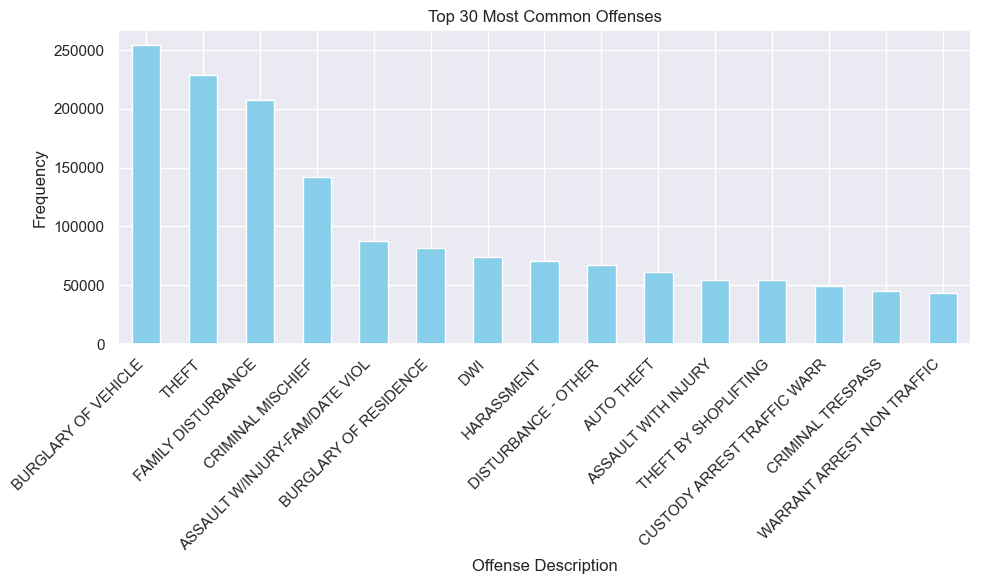

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
offense_counts.plot(kind='bar', color='skyblue')
plt.title('Top 30 Most Common Offenses')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
df.head(5)

Highest Offense Description  Occurred Date Time   Latitude  Longitude  \
4326              ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698 -97.718252   
4918             FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790 -97.694442   
6171                     AUTO THEFT 2023-06-05 20:00:00  30.219033 -97.767189   
7307             FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830 -97.776806   
8720  BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438 -97.681970   

            Date      Time Day_of_Week  Hour  
4326  2023-06-21  18:16:00   Wednesday    18  
4918  2023-09-23  03:07:00    Saturday     3  
6171  2023-06-05  20:00:00      Monday    20  
7307  2023-05-29  12:03:00      Monday    12  
8720  2023-11-06  15:53:00      Monday    15

In [26]:
# Displaying  the data types of each column

print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Highest Offense Description            object
Occurred Date Time             datetime64[ns]
Latitude                              float64
Longitude                             float64
Date                                   object
Time                                   object
Day_of_Week                            object
Hour                                    int32
dtype: object


Options to work on: 

Crime Prediction:
1. Use machine learning algorithms to predict the likelihood of different types of crimes occurring in specific areas based on historical data. This could involve classification algorithms such as Random Forest, Decision Trees, or Gradient Boosting.
2. Crime Hotspot Analysis:
Identify areas with high crime rates (hotspots) using clustering algorithms like K-means or DBSCAN. This can help law enforcement allocate resources more effectively.

In [27]:
df.shape

(2424318, 8)

In [28]:
df.head(3)

Highest Offense Description  Occurred Date Time   Latitude  Longitude  \
4326           ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698 -97.718252   
4918          FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790 -97.694442   
6171                  AUTO THEFT 2023-06-05 20:00:00  30.219033 -97.767189   

            Date      Time Day_of_Week  Hour  
4326  2023-06-21  18:16:00   Wednesday    18  
4918  2023-09-23  03:07:00    Saturday     3  
6171  2023-06-05  20:00:00      Monday    20

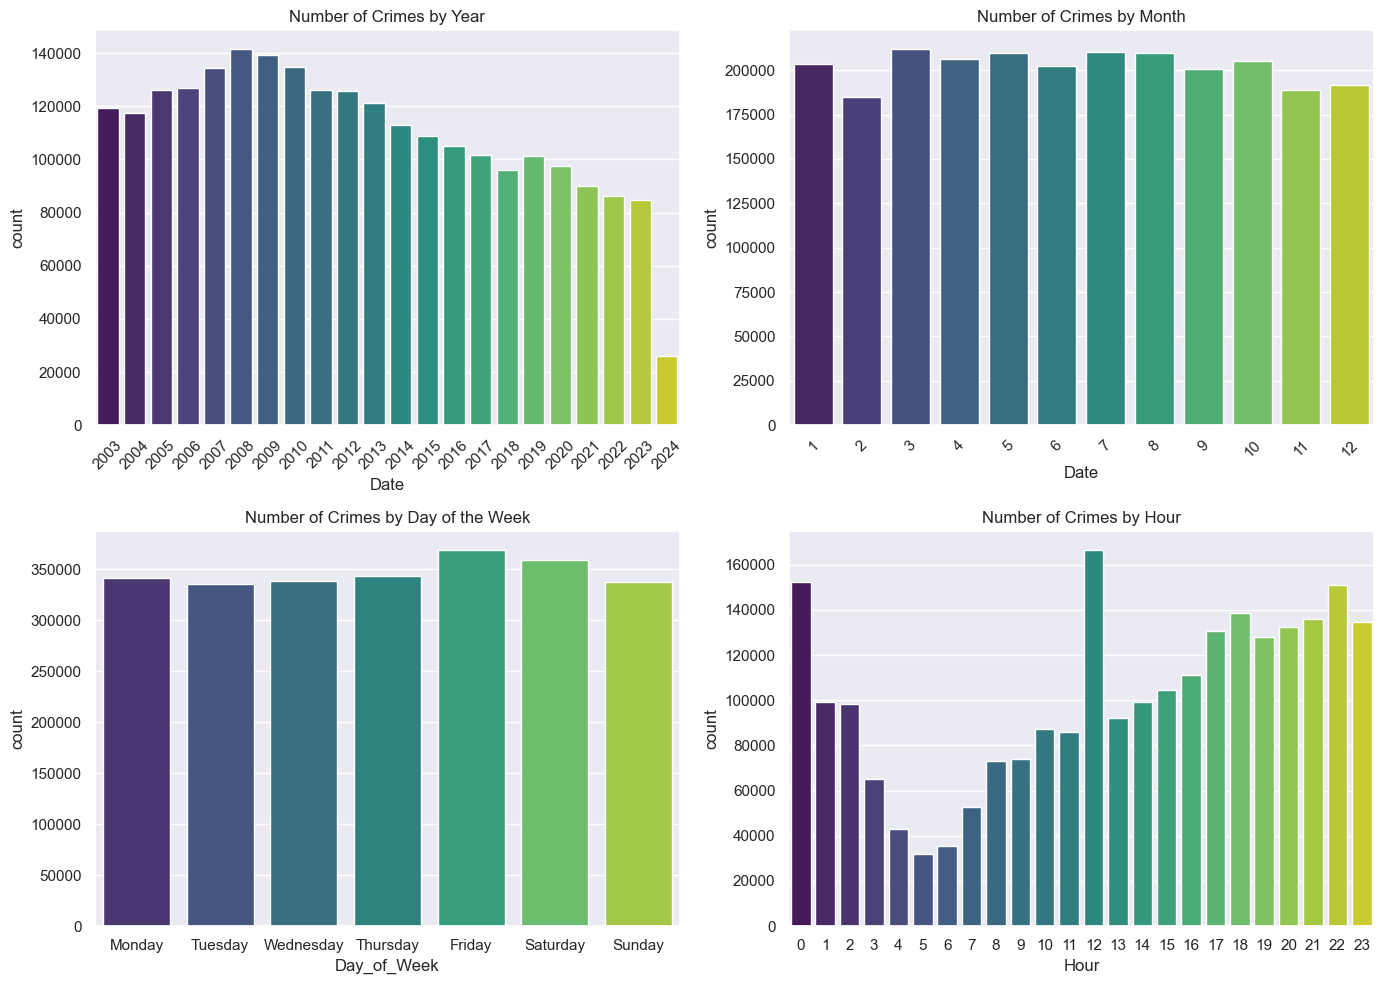

In [29]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the number of crimes over different time periods
plt.figure(figsize=(14, 10))

# Plot 1: Number of crimes by year
plt.subplot(2, 2, 1)
sns.countplot(data=df, x=df['Date'].dt.year, palette='viridis')
plt.title('Number of Crimes by Year')
plt.xticks(rotation=45)

# Plot 2: Number of crimes by month
plt.subplot(2, 2, 2)
sns.countplot(data=df, x=df['Date'].dt.month, palette='viridis')
plt.title('Number of Crimes by Month')
plt.xticks(rotation=45)

# Plot 3: Number of crimes by day of the week
plt.subplot(2, 2, 3)
sns.countplot(data=df, x=df['Day_of_Week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Crimes by Day of the Week')

# Plot 4: Number of crimes by hour
plt.subplot(2, 2, 4)
sns.countplot(data=df, x=df['Hour'], palette='viridis')
plt.title('Number of Crimes by Hour')

plt.tight_layout()
plt.show()


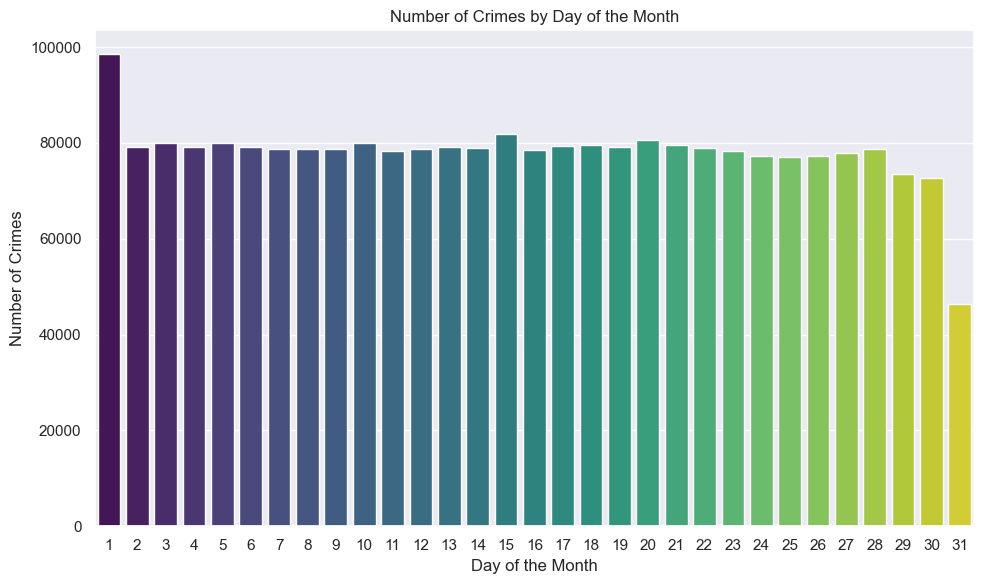

In [30]:
# Plotting the number of crimes over different time periods
plt.figure(figsize=(10, 6))

# Plot: Number of crimes by day of the month
sns.countplot(data=df, x=df['Date'].dt.day, palette='viridis')
plt.title('Number of Crimes by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

In [31]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude       Date      Time Day_of_Week  Hour  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3  
6171    -97.767189 2023-06-05  20:00:00      Monday    20  
7307    -97.776806 2023-05-29  12:03:00      Monday    12  
8720    -97.681970 2023-11-06  15:53:00      Monday    15  
...            ...        ...       ...         ...   ...  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12  
2462413 -97.770554 2010-03-19  19:00:00      Friday    19  
2462414 -97.770694 2008-12-16  15:56:00     Tuesday    15  
2462415 -97.688952 2010-06-06  00:31:00      Sunday     0  
2462416 -97.764287 2010-08-25  16:05:00   Wednesday    16  

[2424318 rows x 8 columns]

## Angular measurements do not get very well represented on a scatter plot 

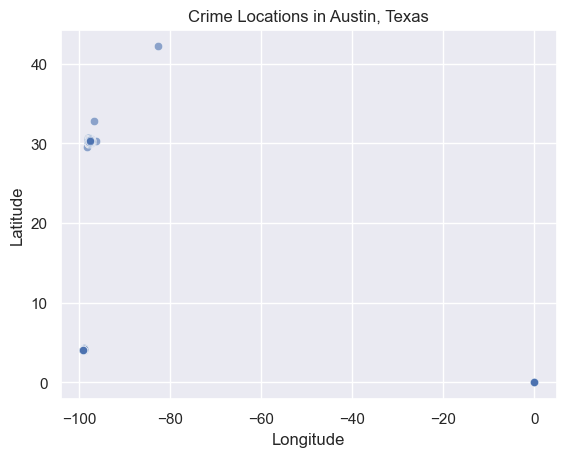

In [32]:
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha = 0.6)

plt.title('Crime Locations in Austin, Texas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

## Using a map of Austin Texas instead, I used the folium library 

In [33]:
# Since my sample has more than 2 million crimes i am using just a sample to visualize 

sample_df = df.sample(frac=0.0001)

# Trying to map the data in a map using folium 

# Creating a map centered around Austin, Texas
austin_map = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# Adding markers for each crime location
for index, row in sample_df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], popup=row['Highest Offense Description'], 
                       radius=2
                       ).add_to(austin_map)

# Display the map
austin_map

## Using a heatmap to visualize zones with more crime

In [34]:
# Creating a HeatMap layer using the latitude and longitude coordinates of crime occurrences

heat_data = [[row['Latitude'], row['Longitude']] for index, row in sample_df.iterrows()]
HeatMap(heat_data, radius=20).add_to(austin_map)

# Displaying the map
austin_map


In [35]:
burglary_df = df[df['Highest Offense Description'] == 'BURGLARY OF VEHICLE']

sample_burglary_df = burglary_df.sample(frac=0.001)

burglary_map = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# Adding markers for each burglary of vehicle location 

for index, row in sample_burglary_df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']], popup=row['Highest Offense Description'], radius=2).add_to(burglary_map)

# Converting latitude and longitude to list of lists for the HeatMap function
heat_data = sample_burglary_df[['Latitude', 'Longitude']].values.tolist()

HeatMap(heat_data).add_to(burglary_map)    

burglary_map

In [36]:
burglary_df

Highest Offense Description  Occurred Date Time   Latitude  Longitude  \
13910           BURGLARY OF VEHICLE 2019-04-04 22:15:00  30.409256 -97.743182   
29332           BURGLARY OF VEHICLE 2023-09-21 12:19:00  30.308457 -97.679006   
29353           BURGLARY OF VEHICLE 2023-07-17 07:30:00  30.226864 -97.742661   
29397           BURGLARY OF VEHICLE 2023-09-16 11:00:00  30.216297 -97.841159   
29424           BURGLARY OF VEHICLE 2023-09-17 01:00:00  30.255572 -97.734914   
...                             ...                 ...        ...        ...   
2462374         BURGLARY OF VEHICLE 2005-06-17 14:00:00  30.265704 -97.769285   
2462381         BURGLARY OF VEHICLE 2007-08-19 19:00:00  30.200675 -97.772537   
2462400         BURGLARY OF VEHICLE 2009-04-15 06:00:00  30.282050 -97.691588   
2462401         BURGLARY OF VEHICLE 2005-08-05 10:36:00  30.259185 -97.716185   
2462413         BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757 -97.770554   

              Date      Time Day_of_Week  Hour  
13910   2019-04-04  22:15:00    Thursday    22  
29332   2023-09-21  12:19:00    Thursday    12  
29353   2023-07-17  07:30:00      Monday     7  
29397   2023-09-16  11:00:00    Saturday    11  
29424   2023-09-17  01:00:00      Sunday     1  
...            ...       ...         ...   ...  
2462374 2005-06-17  14:00:00      Friday    14  
2462381 2007-08-19  19:00:00      Sunday    19  
2462400 2009-04-15  06:00:00   Wednesday     6  
2462401 2005-08-05  10:36:00      Friday    10  
2462413 2010-03-19  19:00:00      Friday    19  

[254063 rows x 8 columns]

In [37]:
sample_burglary_df.sample(10)

Highest Offense Description  Occurred Date Time   Latitude  Longitude  \
1896071         BURGLARY OF VEHICLE 2014-10-03 22:00:00  30.185624 -97.841637   
417160          BURGLARY OF VEHICLE 2022-04-09 13:12:00  30.200165 -97.868501   
1084071         BURGLARY OF VEHICLE 2022-04-21 19:00:00  30.319262 -97.754810   
2202855         BURGLARY OF VEHICLE 2004-10-07 06:45:00  30.323243 -97.705960   
917849          BURGLARY OF VEHICLE 2017-04-15 14:00:00  30.257886 -97.807007   
727327          BURGLARY OF VEHICLE 2011-11-05 11:40:00  30.379259 -97.653263   
799747          BURGLARY OF VEHICLE 2006-10-21 02:30:00  30.216358 -97.780308   
2288827         BURGLARY OF VEHICLE 2020-12-22 19:00:00  30.417456 -97.702843   
737880          BURGLARY OF VEHICLE 2008-04-22 22:00:00  30.208019 -97.802896   
911976          BURGLARY OF VEHICLE 2003-08-07 21:00:00  30.394433 -97.753901   

              Date      Time Day_of_Week  Hour  
1896071 2014-10-03  22:00:00      Friday    22  
417160  2022-04-09  13:12:00    Saturday    13  
1084071 2022-04-21  19:00:00    Thursday    19  
2202855 2004-10-07  06:45:00    Thursday     6  
917849  2017-04-15  14:00:00    Saturday    14  
727327  2011-11-05  11:40:00    Saturday    11  
799747  2006-10-21  02:30:00    Saturday     2  
2288827 2020-12-22  19:00:00     Tuesday    19  
737880  2008-04-22  22:00:00     Tuesday    22  
911976  2003-08-07  21:00:00    Thursday    21

In [38]:
burglary_map

Graphic only of burglary of car by hour 

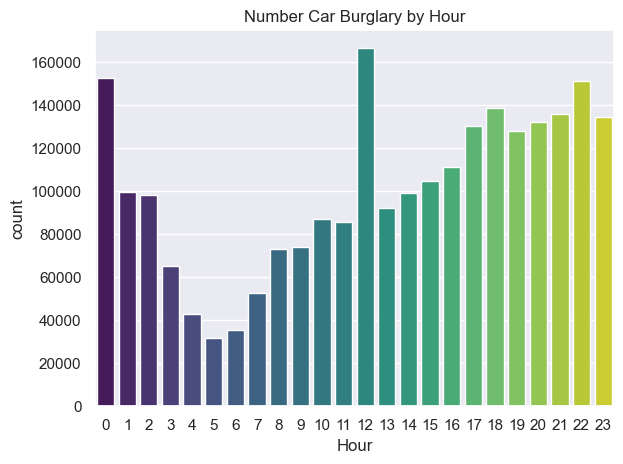

In [39]:
# Plot 4: Number of crimes by hour [burglary of a vehicle]

sns.countplot(data= burglary_df, x=df['Hour'], palette='viridis')
plt.title('Number Car Burglary by Hour')

plt.tight_layout()
plt.show()


Exploring how burglary (The most commited crime is distributed on the city )

# Once data cleaned and in a good tabular form, i can explore some clustering to see if it makes sense with this data. 

Trying to use K means to cluster my data without more processing 


In [40]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude       Date      Time Day_of_Week  Hour  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3  
6171    -97.767189 2023-06-05  20:00:00      Monday    20  
7307    -97.776806 2023-05-29  12:03:00      Monday    12  
8720    -97.681970 2023-11-06  15:53:00      Monday    15  
...            ...        ...       ...         ...   ...  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12  
2462413 -97.770554 2010-03-19  19:00:00      Friday    19  
2462414 -97.770694 2008-12-16  15:56:00     Tuesday    15  
2462415 -97.688952 2010-06-06  00:31:00      Sunday     0  
2462416 -97.764287 2010-08-25  16:05:00   Wednesday    16  

[2424318 rows x 8 columns]

In [41]:
df.dtypes

Highest Offense Description            object
Occurred Date Time             datetime64[ns]
Latitude                              float64
Longitude                             float64
Date                           datetime64[ns]
Time                                   object
Day_of_Week                            object
Hour                                    int32
dtype: object

In [42]:
# Using K means to identify areas with high crime rates 

num_clusters = 5

# Extracting coordiantes

coordinates = df[['Latitude', 'Longitude']]

# Initializing KMeans model 

kmeans =KMeans(n_clusters = num_clusters, random_state = 42, n_init = 10)

# Fitting Kmeans model to the data

kmeans.fit(coordinates)

# Adding cluster labels to the DataFrame

df['Cluster'] = kmeans.labels_

Since these are angular coordinates the clustering fails to identify correctly 

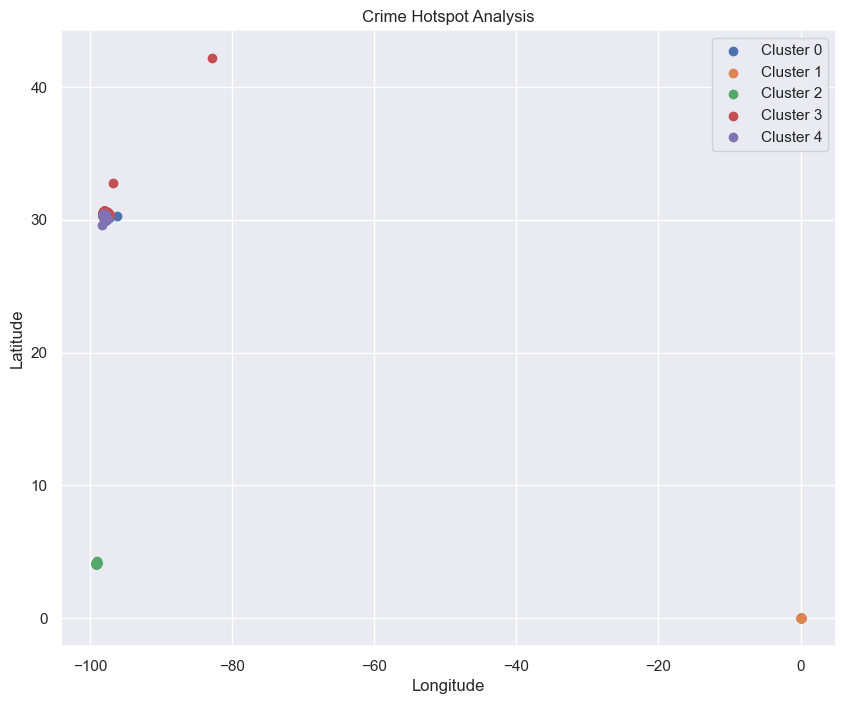

In [43]:
# Visualizing the clusters

plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    cluster_data = coordinates[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_label}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspot Analysis')
plt.legend()
plt.show()

In [44]:
crime_counts = df['Highest Offense Description'].value_counts()
print(crime_counts)

Highest Offense Description
BURGLARY OF VEHICLE                                 254063
THEFT                                               229086
FAMILY DISTURBANCE                                  207413
CRIMINAL MISCHIEF                                   142067
ASSAULT W/INJURY-FAM/DATE VIOL                       87379
                                                     ...  
COERCION OF PUBLIC SERVANT                               1
DRUG/MURDER BY PROVIDING DRUG RESULTING IN DEATH         1
CHILD GROOMING                                           1
VIOL OF PRISONERS RIGHT                                  1
CRASH/NEGLIGENT HOMICIDE                                 1
Name: count, Length: 397, dtype: int64


# Transforming the latitude and longitude to cartesian coordinates 

In [45]:
# Converting latitude and longitude to radians 

latitude_rad = np.radians(df['Latitude'])
longitude_rad = np.radians(df['Longitude'])

# Converting latitude and longitude to cartesian coordinates. 

x = np.cos(latitude_rad) * np.cos(longitude_rad)
y = np.cos(latitude_rad) * np.sin(longitude_rad)

coordinates = np.column_stack((x, y))

kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
clusters = kmeans.fit_predict(coordinates)

df['Cluster'] = clusters

In [46]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18        4  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
...            ...        ...       ...         ...   ...      ...  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12        0  
2462413 -97.770554 2010-03-19  19:00:00      Friday    19        0  
2462414 -97.770694 2008-12-16  15:56:00     Tuesday    15        2  
2462415 -97.688952 2010-06-06  00:31:00      Sunday     0        4  
2462416 -97.764287 2010-08-25  16:05:00   Wednesday    16        0  

[2424318 rows x 9 columns]

In [47]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18        4  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
...            ...        ...       ...         ...   ...      ...  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12        0  
2462413 -97.770554 2010-03-19  19:00:00      Friday    19        0  
2462414 -97.770694 2008-12-16  15:56:00     Tuesday    15        2  
2462415 -97.688952 2010-06-06  00:31:00      Sunday     0        4  
2462416 -97.764287 2010-08-25  16:05:00   Wednesday    16        0  

[2424318 rows x 9 columns]

In [48]:
df.to_csv('crime_data.csv', index=False, header=True)


Visualizing my clusters with folium

# Since my data contains more than 2 million rows of 20 years of crime, data will be filters as follows: Only last 5 years of crime and only the most 15 repeated crimes will be used.

Testing with a sample of 0.01% of samples 

In [49]:
sample_df = df.sample(frac=0.001)

# Create a map centered around the mean latitude and longitude
map_center = [sample_df['Latitude'].mean(), sample_df['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=10)

# Define colors for each cluster
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Add markers for each crime location, colored by cluster
for index, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=cluster_colors[row['Cluster']],
        fill=True,
        fill_color=cluster_colors[row['Cluster']],
        popup=row['Highest Offense Description']
    ).add_to(crime_map)

# Display the map
crime_map


Testing with all samples (Doing this crashed my Kernel ) 

In [50]:
df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   
2462413            BURGLARY OF VEHICLE 2010-03-19 19:00:00  30.265757   
2462414               PROTECTIVE ORDER 2008-12-16 15:56:00  30.239131   
2462415    VIOL CITY ORDINANCE - OTHER 2010-06-06 00:31:00  30.358489   
2462416            FORGERY AND PASSING 2010-08-25 16:05:00  30.243395   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18        4  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
...            ...        ...       ...         ...   ...      ...  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12        0  
2462413 -97.770554 2010-03-19  19:00:00      Friday    19        0  
2462414 -97.770694 2008-12-16  15:56:00     Tuesday    15        2  
2462415 -97.688952 2010-06-06  00:31:00      Sunday     0        4  
2462416 -97.764287 2010-08-25  16:05:00   Wednesday    16        0  

[2424318 rows x 9 columns]

In [51]:
df.dtypes

Highest Offense Description            object
Occurred Date Time             datetime64[ns]
Latitude                              float64
Longitude                             float64
Date                           datetime64[ns]
Time                                   object
Day_of_Week                            object
Hour                                    int32
Cluster                                 int32
dtype: object

In [52]:
start_date = pd.Timestamp('2019-01-01')
final_date = pd.Timestamp('2023-12-31')

filtered_df = df[(df['Occurred Date Time'] >= start_date) & (df['Occurred Date Time'] <= final_date)]
filtered_df

Highest Offense Description  Occurred Date Time   Latitude  \
4326                 ASSAULT BY THREAT 2023-06-21 18:16:00  30.352698   
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
...                                ...                 ...        ...   
2462396            THEFT OF AUTO PARTS 2020-09-19 01:20:00  30.217910   
2462398               DEBIT CARD ABUSE 2021-02-28 12:00:00  30.416167   
2462399         BURGLARY NON RESIDENCE 2021-10-14 02:14:00  30.431052   
2462408         BURGLARY NON RESIDENCE 2022-11-20 02:30:00  30.406717   
2462412               DEBIT CARD ABUSE 2020-09-24 12:00:00  30.211876   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4326    -97.718252 2023-06-21  18:16:00   Wednesday    18        4  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
...            ...        ...       ...         ...   ...      ...  
2462396 -97.776764 2020-09-19  01:20:00    Saturday     1        2  
2462398 -97.695370 2021-02-28  12:00:00      Sunday    12        4  
2462399 -97.764366 2021-10-14  02:14:00    Thursday     2        4  
2462408 -97.712969 2022-11-20  02:30:00      Sunday     2        4  
2462412 -97.731707 2020-09-24  12:00:00    Thursday    12        0  

[460086 rows x 9 columns]

In [53]:
offense_counts = filtered_df['Highest Offense Description'].value_counts().head(15)

In [54]:
offense_counts

Highest Offense Description
FAMILY DISTURBANCE                47121
BURGLARY OF VEHICLE               42277
THEFT                             33685
CRIMINAL MISCHIEF                 25101
AUTO THEFT                        23047
ASSAULT W/INJURY-FAM/DATE VIOL    16139
ASSAULT WITH INJURY               12238
HARASSMENT                        11561
DISTURBANCE - OTHER               11244
THEFT BY SHOPLIFTING              11150
BURGLARY NON RESIDENCE             9858
CRIMINAL TRESPASS                  9474
DWI                                8970
BURGLARY OF RESIDENCE              8391
BURGLARY OF VEH-NO SUSPECT/FU      8390
Name: count, dtype: int64

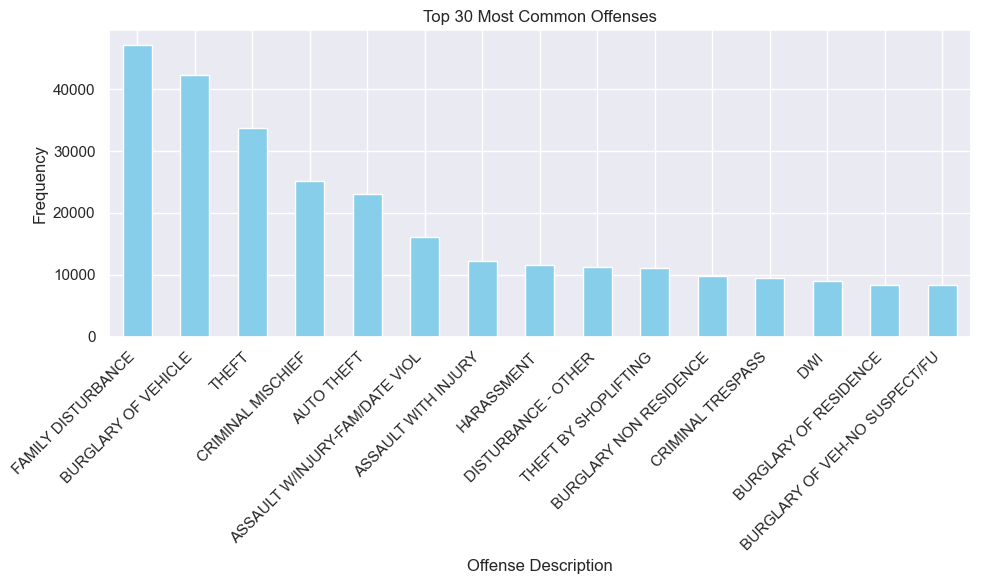

In [55]:
# Plotting
plt.figure(figsize=(10, 6))
offense_counts.plot(kind='bar', color='skyblue')
plt.title('Top 30 Most Common Offenses')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
num_distinct_crimes = df['Highest Offense Description'].nunique()
print(f"There are {num_distinct_crimes} distinct crimes in the Highest Offense Description column.")



There are 397 distinct crimes in the Highest Offense Description column.


In [57]:


# Getting the top 15 most frequent crimes
top_15_crimes = filtered_df['Highest Offense Description'].value_counts().head(15).index

# Filtering the DataFrame to include only rows with these top 15 crimes
reduced_df = filtered_df[filtered_df['Highest Offense Description'].isin(top_15_crimes)]

# Display the reduced DataFrame
reduced_df


Highest Offense Description  Occurred Date Time   Latitude  \
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
9672                        HARASSMENT 2023-11-08 11:00:00  30.230053   
...                                ...                 ...        ...   
2462362            BURGLARY OF VEHICLE 2020-09-26 11:30:00  30.419320   
2462385                          THEFT 2020-10-04 17:00:00  30.361844   
2462388              CRIMINAL MISCHIEF 2021-03-19 12:19:00  30.309103   
2462399         BURGLARY NON RESIDENCE 2021-10-14 02:14:00  30.431052   
2462408         BURGLARY NON RESIDENCE 2022-11-20 02:30:00  30.406717   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
9672    -97.693260 2023-11-08  11:00:00   Wednesday    11        0  
...            ...        ...       ...         ...   ...      ...  
2462362 -97.712871 2020-09-26  11:30:00    Saturday    11        4  
2462385 -97.736063 2020-10-04  17:00:00      Sunday    17        4  
2462388 -97.759910 2021-03-19  12:19:00      Friday    12        0  
2462399 -97.764366 2021-10-14  02:14:00    Thursday     2        4  
2462408 -97.712969 2022-11-20  02:30:00      Sunday     2        4  

[278646 rows x 9 columns]

## Dataframe with 2020 to 2024 (present) 15 more comitted crimes

In [58]:
reduced_df.to_csv('crime_data_reduced.csv', index=False, header=True)


In [59]:
reduced_df

Highest Offense Description  Occurred Date Time   Latitude  \
4918                FAMILY DISTURBANCE 2023-09-23 03:07:00  30.325790   
6171                        AUTO THEFT 2023-06-05 20:00:00  30.219033   
7307                FAMILY DISTURBANCE 2023-05-29 12:03:00  30.129830   
8720     BURGLARY OF VEH-NO SUSPECT/FU 2023-11-06 15:53:00  30.307438   
9672                        HARASSMENT 2023-11-08 11:00:00  30.230053   
...                                ...                 ...        ...   
2462362            BURGLARY OF VEHICLE 2020-09-26 11:30:00  30.419320   
2462385                          THEFT 2020-10-04 17:00:00  30.361844   
2462388              CRIMINAL MISCHIEF 2021-03-19 12:19:00  30.309103   
2462399         BURGLARY NON RESIDENCE 2021-10-14 02:14:00  30.431052   
2462408         BURGLARY NON RESIDENCE 2022-11-20 02:30:00  30.406717   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
4918    -97.694442 2023-09-23  03:07:00    Saturday     3        4  
6171    -97.767189 2023-06-05  20:00:00      Monday    20        2  
7307    -97.776806 2023-05-29  12:03:00      Monday    12        2  
8720    -97.681970 2023-11-06  15:53:00      Monday    15        4  
9672    -97.693260 2023-11-08  11:00:00   Wednesday    11        0  
...            ...        ...       ...         ...   ...      ...  
2462362 -97.712871 2020-09-26  11:30:00    Saturday    11        4  
2462385 -97.736063 2020-10-04  17:00:00      Sunday    17        4  
2462388 -97.759910 2021-03-19  12:19:00      Friday    12        0  
2462399 -97.764366 2021-10-14  02:14:00    Thursday     2        4  
2462408 -97.712969 2022-11-20  02:30:00      Sunday     2        4  

[278646 rows x 9 columns]

In [60]:

# Assuming reduced_df is your DataFrame
sampled_df = reduced_df.sample(frac=0.10, random_state=1)

In [61]:
sampled_df


Highest Offense Description  Occurred Date Time   Latitude  \
456504               FAMILY DISTURBANCE 2021-05-12 22:53:00  30.214964   
1676773  ASSAULT W/INJURY-FAM/DATE VIOL 2021-09-12 13:24:00  30.299307   
1026059                           THEFT 2019-04-08 16:30:00  30.376704   
1859419            THEFT BY SHOPLIFTING 2019-06-27 12:46:00  30.259557   
451308                       AUTO THEFT 2021-09-03 19:45:00  30.448277   
...                                 ...                 ...        ...   
1901292              FAMILY DISTURBANCE 2019-01-04 08:59:00  30.409711   
1390618             BURGLARY OF VEHICLE 2022-07-01 00:00:00  30.256806   
263411              DISTURBANCE - OTHER 2019-01-27 21:05:00  30.261717   
204276               FAMILY DISTURBANCE 2022-05-16 01:43:00  30.328759   
946009                CRIMINAL TRESPASS 2019-06-26 21:45:00  30.267976   

         Longitude       Date      Time Day_of_Week  Hour  Cluster  
456504  -97.789154 2021-05-12  22:53:00   Wednesday    22        2  
1676773 -97.673692 2021-09-12  13:24:00      Sunday    13        4  
1026059 -97.731546 2019-04-08  16:30:00      Monday    16        4  
1859419 -97.711375 2019-06-27  12:46:00    Thursday    12        0  
451308  -97.787953 2021-09-03  19:45:00      Friday    19        4  
...            ...        ...       ...         ...   ...      ...  
1901292 -97.740260 2019-01-04  08:59:00      Friday     8        4  
1390618 -97.739177 2022-07-01  00:00:00      Friday     0        0  
263411  -97.739029 2019-01-27  21:05:00      Sunday    21        0  
204276  -97.680661 2022-05-16  01:43:00      Monday     1        4  
946009  -97.737616 2019-06-26  21:45:00   Wednesday    21        0  

[27865 rows x 9 columns]

In [62]:
sampled_df.to_csv('crime_data_reduced.csv', index=False)


## Once the data has been cleaned, formated and explored, the data visualization dashboards will be done in Tableau.

Other sources used to build this notebook.

https://github.com/fescobar96/Crime-Prediction-in-San-Francisco/blob/master/Model.ipynb

### Example of deployed dashboards.

https://public.tableau.com/views/Copiadefinal_project/CrimeLocation?:language=es-ES&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

https://public.tableau.com/shared/4883Z62MR?:display_count=n&:origin=viz_share_link